In [12]:
#pip install yfinance mplfinance

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mplfinance as mpf
import seaborn as sb

In [4]:
tickers = ['TSLA', 'NVDA', 'SHOP', 'ZM']
start_date = '1980-01-01'
end_date = '2024-05-31'

data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  4 of 4 completed


In [5]:
data.head()

Price                     Adj Close                   Close                \
Ticker                         NVDA SHOP TSLA  ZM      NVDA SHOP TSLA  ZM   
Date                                                                        
1999-01-22 00:00:00+00:00  0.037618  NaN  NaN NaN  0.041016  NaN  NaN NaN   
1999-01-25 00:00:00+00:00  0.041559  NaN  NaN NaN  0.045313  NaN  NaN NaN   
1999-01-26 00:00:00+00:00  0.038334  NaN  NaN NaN  0.041797  NaN  NaN NaN   
1999-01-27 00:00:00+00:00  0.038215  NaN  NaN NaN  0.041667  NaN  NaN NaN   
1999-01-28 00:00:00+00:00  0.038095  NaN  NaN NaN  0.041536  NaN  NaN NaN   

Price                          High       ...  Low          Open            \
Ticker                         NVDA SHOP  ... TSLA  ZM      NVDA SHOP TSLA   
Date                                      ...                                
1999-01-22 00:00:00+00:00  0.048828  NaN  ...  NaN NaN  0.043750  NaN  NaN   
1999-01-25 00:00:00+00:00  0.045833  NaN  ...  NaN NaN  0.044271  NaN  NaN   
1999-01-26 00:00:00+00:00  0.046745  NaN  ...  NaN NaN  0.045833  NaN  NaN   
1999-01-27 00:00:00+00:00  0.042969  NaN  ...  NaN NaN  0.041927  NaN  NaN   
1999-01-28 00:00:00+00:00  0.041927  NaN  ...  NaN NaN  0.041667  NaN  NaN   

Price                              Volume                
Ticker                     ZM        NVDA SHOP TSLA  ZM  
Date                                                     
1999-01-22 00:00:00+00:00 NaN  2714688000  NaN  NaN NaN  
1999-01-25 00:00:00+00:00 NaN   510480000  NaN  NaN NaN  
1999-01-26 00:00:00+00:00 NaN   343200000  NaN  NaN NaN  
1999-01-27 00:00:00+00:00 NaN   244368000  NaN  NaN NaN  
1999-01-28 00:00:00+00:00 NaN   227520000  NaN  NaN NaN  

[5 rows x 24 columns]

In [6]:
adj_close = data['Adj Close']
adj_close = adj_close.fillna(method='ffill')

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_52793/2798281176.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adj_close = adj_close.fillna(method='ffill')


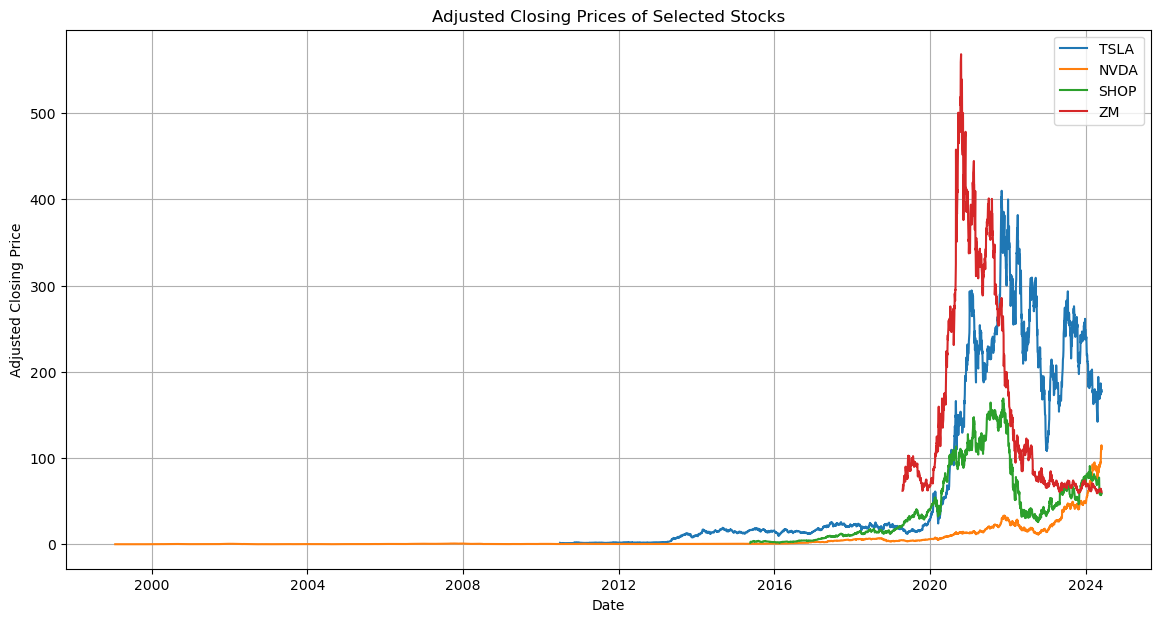

In [7]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(adj_close[ticker], label=ticker)
plt.title('Adjusted Closing Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.grid(True)

In [8]:
#pip install pandas_datareader

In [9]:
from pandas_datareader import data as pdr

cpi = pdr.get_data_fred('CPIAUCSL', start=start_date, end=end_date)
cpi = cpi.ffill()

In [10]:
unemployment_rate = pdr.get_data_fred('UNRATE', start=start_date, end=end_date)
unemployment_rate = unemployment_rate.ffill()

In [11]:
gdp = pdr.get_data_fred('GDP', start=start_date, end=end_date)
gdp = gdp.ffill()

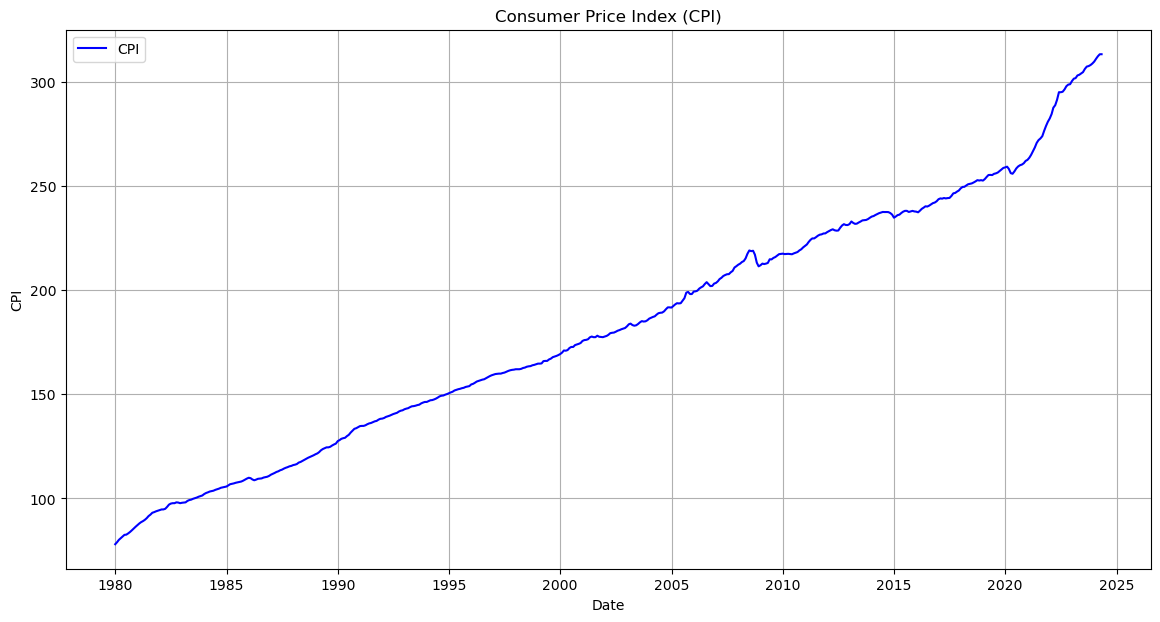

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(cpi, label='CPI', color='blue')
plt.title('Consumer Price Index (CPI)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)

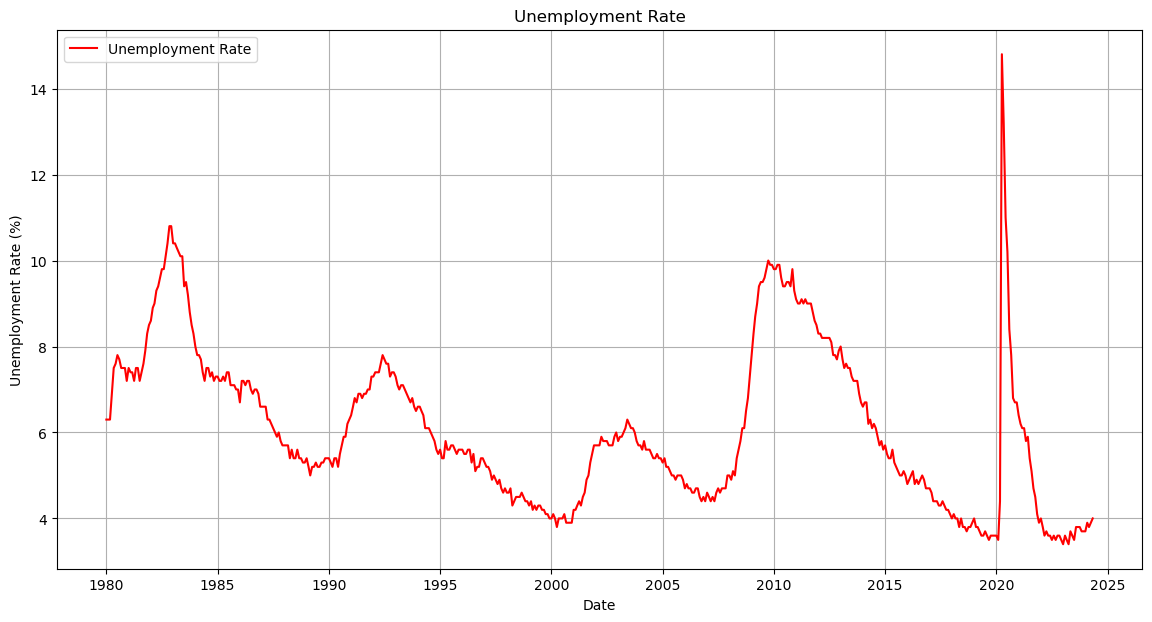

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(unemployment_rate, label='Unemployment Rate', color='red')
plt.title('Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)

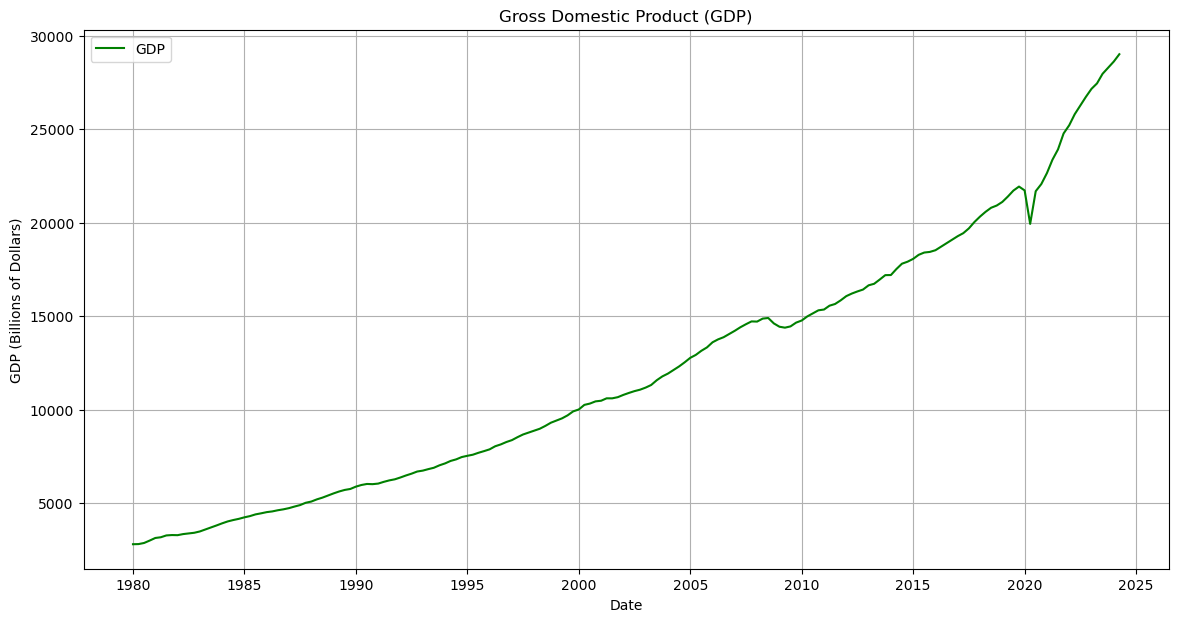

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(gdp, label='GDP', color='green')
plt.title('Gross Domestic Product (GDP)')
plt.xlabel('Date')
plt.ylabel('GDP (Billions of Dollars)')
plt.legend()
plt.grid(True)

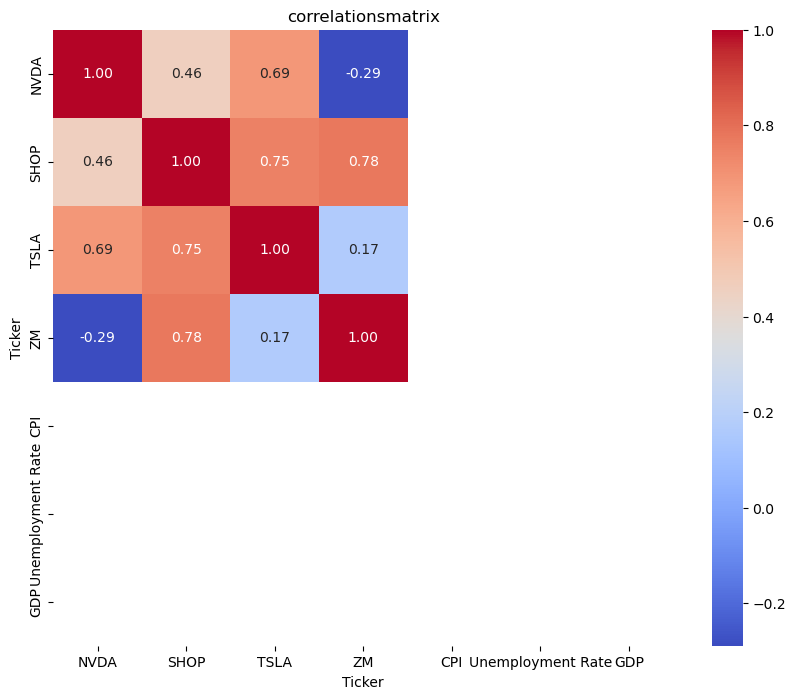

In [15]:
# Merging data
merged_data = adj_close.copy()
merged_data['CPI'] = cpi['CPIAUCSL']
merged_data['Unemployment Rate'] = unemployment_rate['UNRATE']
merged_data['GDP'] = gdp['GDP']

# Calculating correlation
correlation_matrix = merged_data.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()